# Bike Sharing Assignment

### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Essentially the company wants :
- To understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19, by creating a linear model.
- To identify the variables affecting their revenues i.e. Which variables are significant in predicting the demand for shared bikes.
- To know the accuracy of the model, i.e. How well those variables describe the bike demands

They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.




## Step 1 -  Reading & Understanding Data

### Reading the Bike sharing dataset

In [2868]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2869]:
# load the data
bike_sharing_data = pd.read_csv('day.csv')

In [2870]:
## checking the first 5 row
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2871]:
## checking the rows and column counts
bike_sharing_data.shape

(730, 16)

In [2872]:
## checking the  data type of columns
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [2873]:
## checking more info about the columns
bike_sharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [2874]:
# now checking the null or missing values
bike_sharing_null_check_row_wise = round(((bike_sharing_data.isnull().sum())/len(bike_sharing_data)) * 100, 2)
bike_sharing_null_check_row_wise

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [2875]:
# now checking the null or missing values
bike_sharing_null_check_column_wise = round(((bike_sharing_data.isnull().sum(axis=1))/len(bike_sharing_data)) * 100, 2)
bike_sharing_null_check_column_wise

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
725    0.0
726    0.0
727    0.0
728    0.0
729    0.0
Length: 730, dtype: float64

In [2876]:
# dropping the duplicates
bike_sharing_data.drop_duplicates(inplace=True)
bike_sharing_data.shape

(730, 16)

### <font color = 'red'> Result: Duplicate values are not present </font> 

### Data Cleaing Process by checking each row , columns data by value_counts

In [2877]:
for each_column in bike_sharing_data:
    print(bike_sharing_data[each_column].value_counts(ascending=False), '\n\n\n')

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64 



01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 



1    499
0    231
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.9894

### <font color = 'red'> Result: There seems to be no Junk/Unknown values in the entire dataset. </font> 

### Removing redundant & unwanted columns


Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

- instant : Its only an index value , we have a default index for the same purpose

- dteday : This has the date, Since we already have seperate columns for 'year' & 'month'. We can extract day from this columns for future analysis. hence, we can carry out our analysis without this column .

- casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

We will craete the new dataframe as updated_bike_data so that the original dataset is preserved for any future analysis/validation

In [2878]:
bike_sharing_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [2879]:
updated_bike_data = bike_sharing_data[['season', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt','yr']]

In [2880]:
updated_bike_data.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,yr
0,1,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0
2,1,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0
3,1,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0
4,1,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0


In [2881]:
updated_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  yr          730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


## Step 2: Data Preparation

In [2882]:
## mapping no-binary category column to original value
print(updated_bike_data['mnth'].value_counts(), '\n')
print(updated_bike_data['season'].value_counts(), '\n')
print(updated_bike_data['weathersit'].value_counts(), '\n')
print(updated_bike_data['weekday'].value_counts(), '\n')

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 

3    188
2    184
1    180
4    178
Name: season, dtype: int64 

1    463
2    246
3     21
Name: weathersit, dtype: int64 

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 



In [2883]:
import calendar
updated_bike_data['mnth'] = updated_bike_data['mnth'].apply(lambda x: calendar.month_abbr[x])

C:\Users\indra\AppData\Local\Temp\ipykernel_17904\498426217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_bike_data['mnth'] = updated_bike_data['mnth'].apply(lambda x: calendar.month_abbr[x])


In [2884]:
# mapping session
updated_bike_data['season'] = updated_bike_data['season'].map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})


C:\Users\indra\AppData\Local\Temp\ipykernel_17904\2152622138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_bike_data['season'] = updated_bike_data['season'].map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})


In [2885]:
# Mapping weathersit
updated_bike_data.weathersit = updated_bike_data.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

C:\Users\indra\AppData\Local\Temp\ipykernel_17904\2035691247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_bike_data.weathersit = updated_bike_data.weathersit.map({1:'Clear',2:'Mist & Cloudy',


In [2886]:
# Mapping weathersit
updated_bike_data.weekday = updated_bike_data.weekday.map({1:'Monday',2:'Tuesday', 
                                             3:'Wednesday',4:'Thursday',5: "Friday",6: "Saturday",0: "Sunday"})

C:\Users\indra\AppData\Local\Temp\ipykernel_17904\2969616368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_bike_data.weekday = updated_bike_data.weekday.map({1:'Monday',2:'Tuesday',


In [2887]:
## checking data after mapping
updated_bike_data

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,yr
0,Spring,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985,0
1,Spring,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801,0
2,Spring,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0
3,Spring,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0
4,Spring,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,Dec,0,Thursday,1,Mist & Cloudy,10.420847,11.33210,65.2917,23.458911,2114,1
726,Spring,Dec,0,Friday,1,Mist & Cloudy,10.386653,12.75230,59.0000,10.416557,3095,1
727,Spring,Dec,0,Saturday,0,Mist & Cloudy,10.386653,12.12000,75.2917,8.333661,1341,1
728,Spring,Dec,0,Sunday,0,Clear,10.489153,11.58500,48.3333,23.500518,1796,1


## Step 3: Visualising the Data

#### Visualising Numeric Variables : Using a pairplot

<AxesSubplot:>

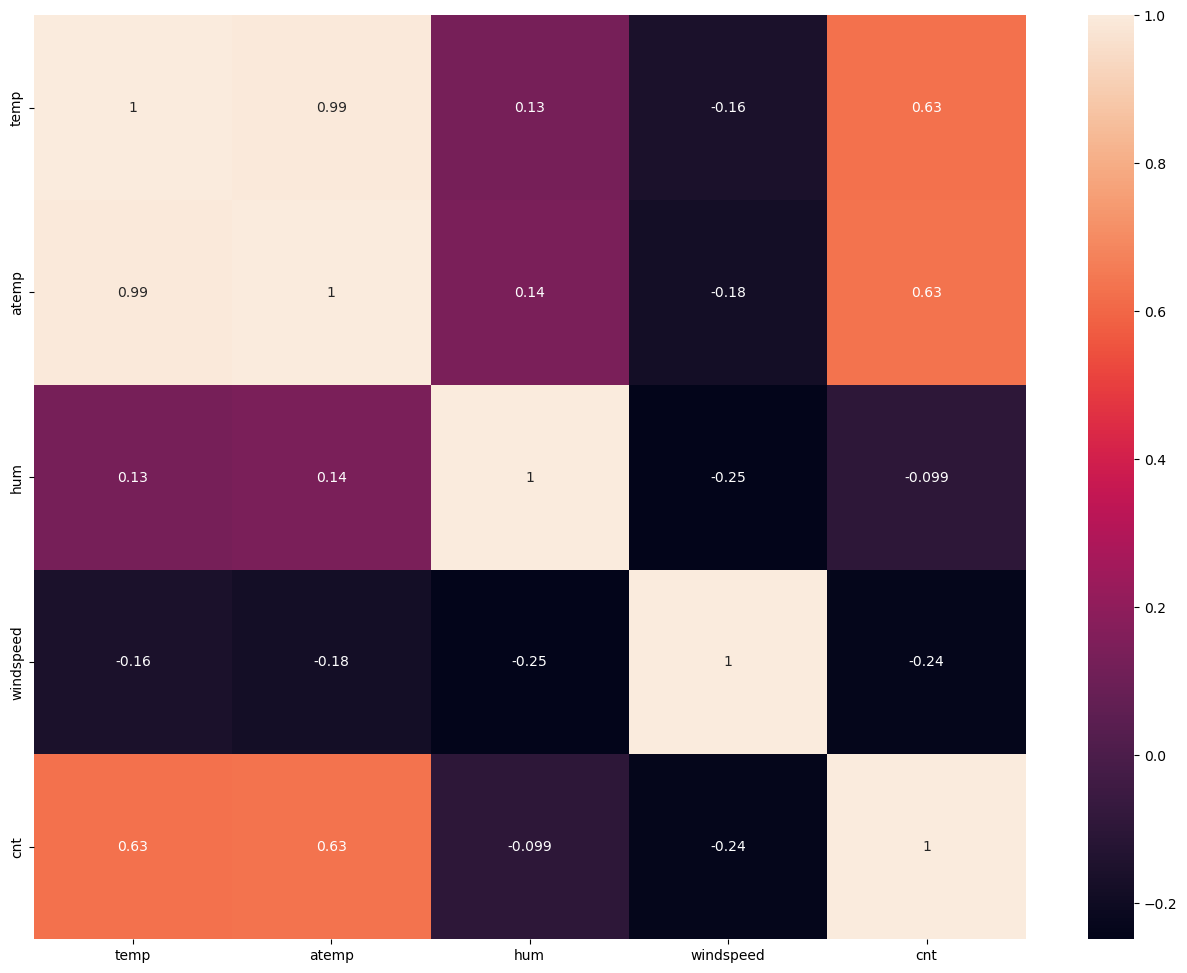

In [2888]:
 # creating a dataframe based on 5 column temp, atemp, hump, windspeed, cnt
based_on_numerical_data =  updated_bike_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

plt.figure(figsize=(16,12))
sns.heatmap(based_on_numerical_data.corr(),annot=True)

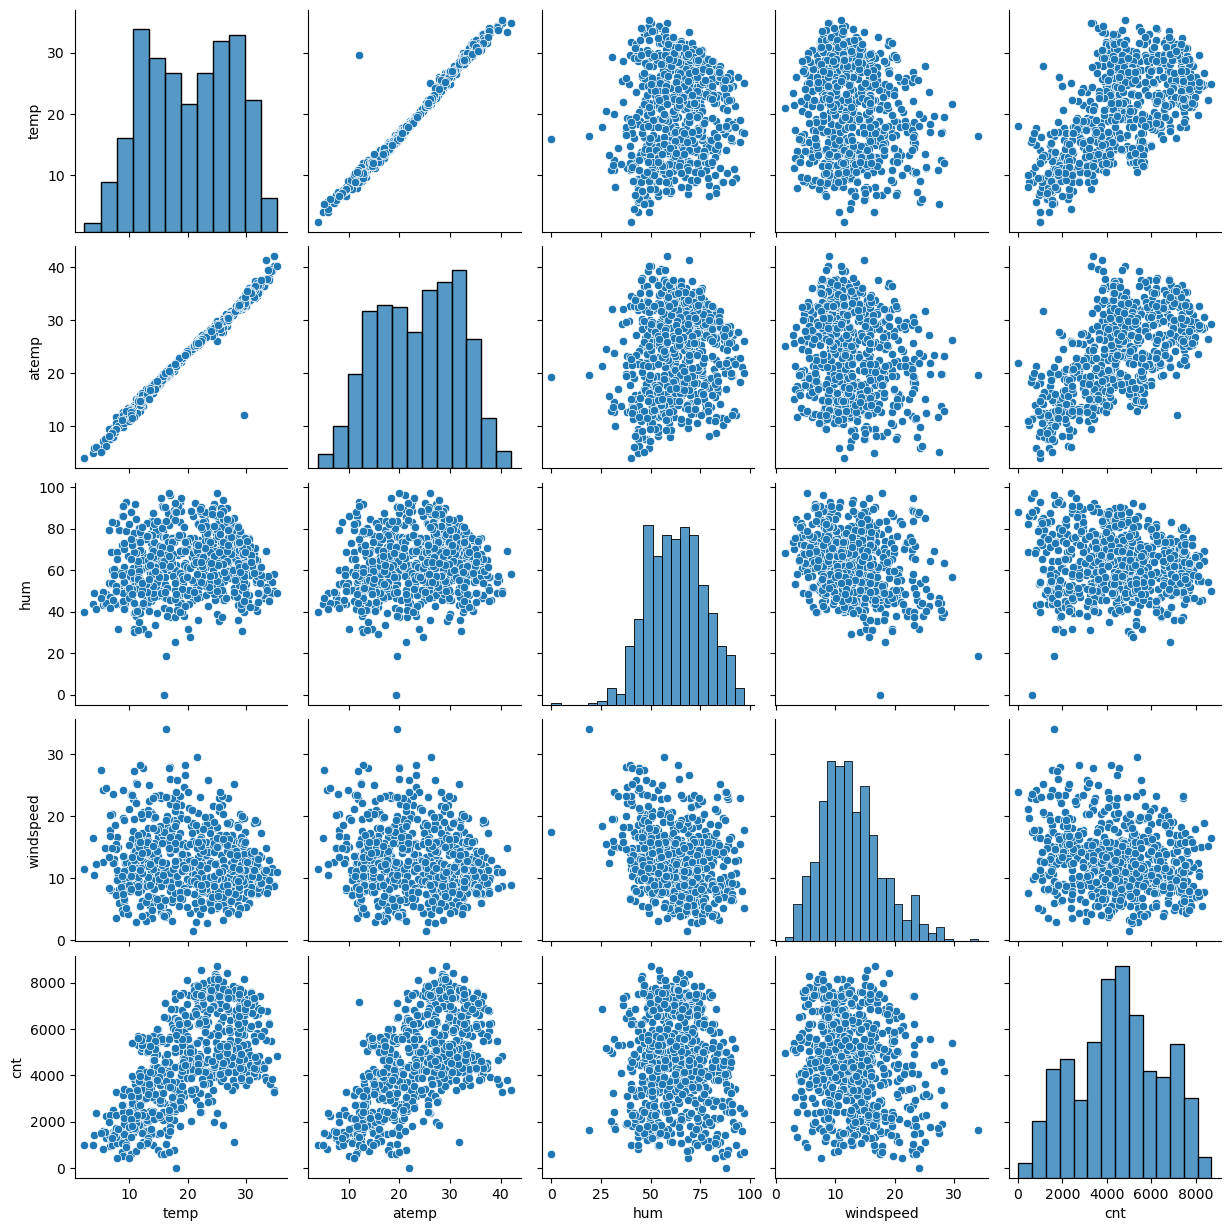

In [2889]:
sns.pairplot(based_on_numerical_data)
plt.show()

### <font color = 'red'> Conclusion : </font>
By visualising the numeric variables, we can conclude that a linear model can be considered in this case because there are atleast some independent variables like atemp , temp etc. that show a positive correlation with the target variable cnt .  

#### Visualising Categorical Variables : Using a Boxplot

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

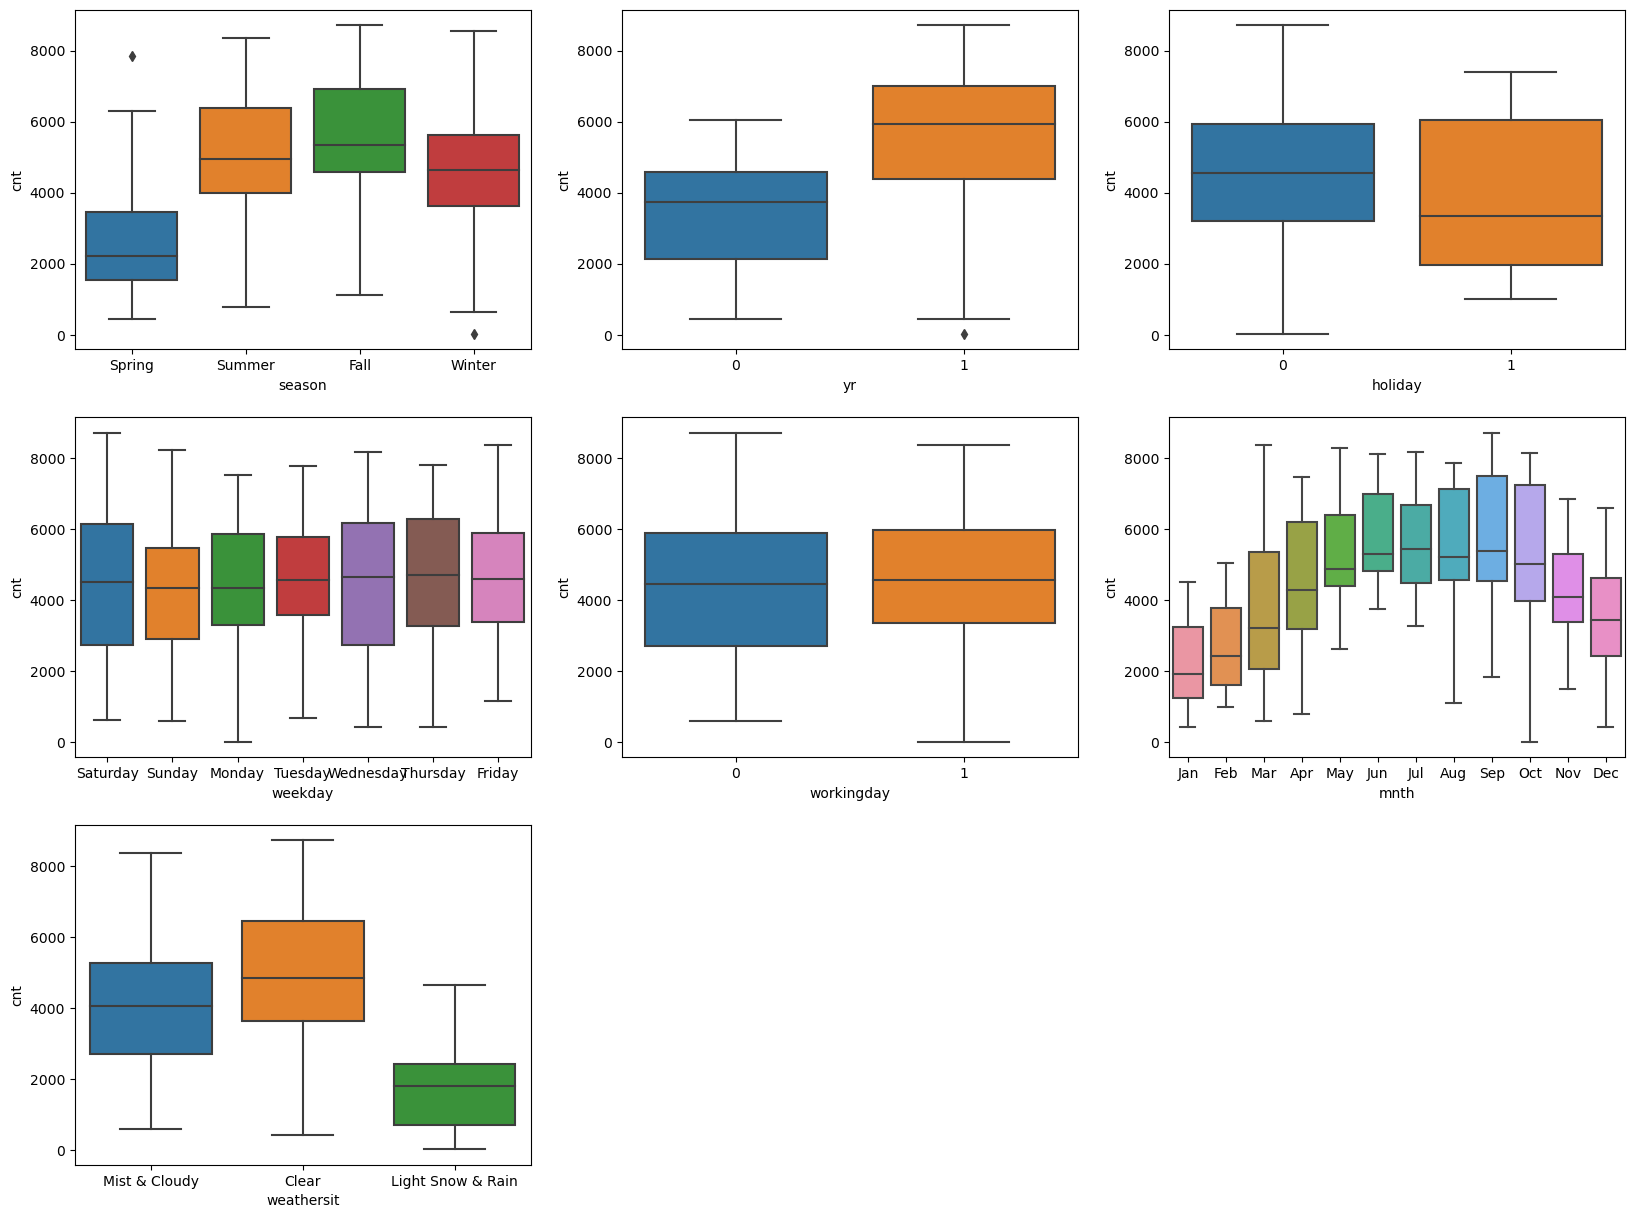

In [2890]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt', data=updated_bike_data)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt', data=updated_bike_data)
plt.subplot(3,3,3)
sns.boxplot(x='holiday',y='cnt', data=updated_bike_data)
plt.subplot(3,3,4)
sns.boxplot(x='weekday',y='cnt', data=updated_bike_data)
plt.subplot(3,3,5)
sns.boxplot(x='workingday',y='cnt', data=updated_bike_data)
plt.subplot(3,3,6)
sns.boxplot(x='mnth',y='cnt', data=updated_bike_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = updated_bike_data)

### <font color = 'red'> Conslusions: </font>
- The graph clearly shows the qualitative distributions of the data, now if the model suggests the important predictors, using these graphs we can be more confident about the predictions of the model.
- For the variable season, we can clearly see that the category 3 : Fall, has the highest median, which shows that the demand was high during this season. It is least for 1: spring .
- The year 2019 had a higher count of users as compared to the year 2018
- The bike demand is almost constant throughout the week.
- The count of total users is in between 4000 to 6000 (~5500) during clear weather
- The count is highest in the month of August
- The count of users is less during the holidays

### creating dummt variables
 
The variables `mnth` `weekday` `season` `weathersit` have various levels, for ex, `weathersit` has 3 levels , similarly variable `mnth` has 12 levels.   
We will create DUMMY variables for these 4 categorical variables namely - `mnth`, `weekday`, `season` & `weathersit`.

In [2891]:
bike_dummy = updated_bike_data[['mnth','weekday', 'season', 'weathersit']]
bike_dummy = pd.get_dummies(bike_dummy,drop_first=True)

# adding dummy variable to original data set
updated_bike_data = pd.concat([updated_bike_data,bike_dummy],axis=1)

# checking the data frame after adding dummy data
updated_bike_data.shape

(730, 34)

In [2892]:
#Deleting the orginal columns season.weathersit,weekday,mnth
updated_bike_data.drop(['season'],axis=1,inplace=True)
updated_bike_data.drop(['weathersit'],axis=1,inplace=True)

updated_bike_data.drop(['weekday'],axis=1,inplace=True)

updated_bike_data.drop(['mnth'],axis=1,inplace=True)


updated_bike_data.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,yr,mnth_Aug,mnth_Dec,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,season_Spring,season_Summer,season_Winter,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,1,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets
The first basic step for regression is performing a train-test split.

In [2893]:
train, test = train_test_split(updated_bike_data,train_size=0.7,test_size=0.3,random_state=100)

In [2894]:
test.shape

(219, 30)

In [2895]:
train.shape

(510, 30)

In [2896]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   holiday                       510 non-null    int64  
 1   workingday                    510 non-null    int64  
 2   temp                          510 non-null    float64
 3   atemp                         510 non-null    float64
 4   hum                           510 non-null    float64
 5   windspeed                     510 non-null    float64
 6   cnt                           510 non-null    int64  
 7   yr                            510 non-null    int64  
 8   mnth_Aug                      510 non-null    uint8  
 9   mnth_Dec                      510 non-null    uint8  
 10  mnth_Feb                      510 non-null    uint8  
 11  mnth_Jan                      510 non-null    uint8  
 12  mnth_Jul                      510 non-null    uint8  
 13  mnth

## Step - 5 Rescaling feature

Although scaling doesnot impact the linear model in the case of simple linear regression, however while performing multiplwe linear regression it might impact the model. As we can see that the value of the feature cnt has much higher values as compared to the other features like temp, atemp etc.So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.

In [2897]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [2898]:
# apply scaler to  all the columns except  the dummy variable

num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [2899]:
train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,yr,mnth_Aug,mnth_Dec,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,season_Spring,season_Summer,season_Winter,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.507843,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.243137,0.245098,0.24902,0.029412,0.343137
std,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.500429,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.429398,0.430568,0.43287,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


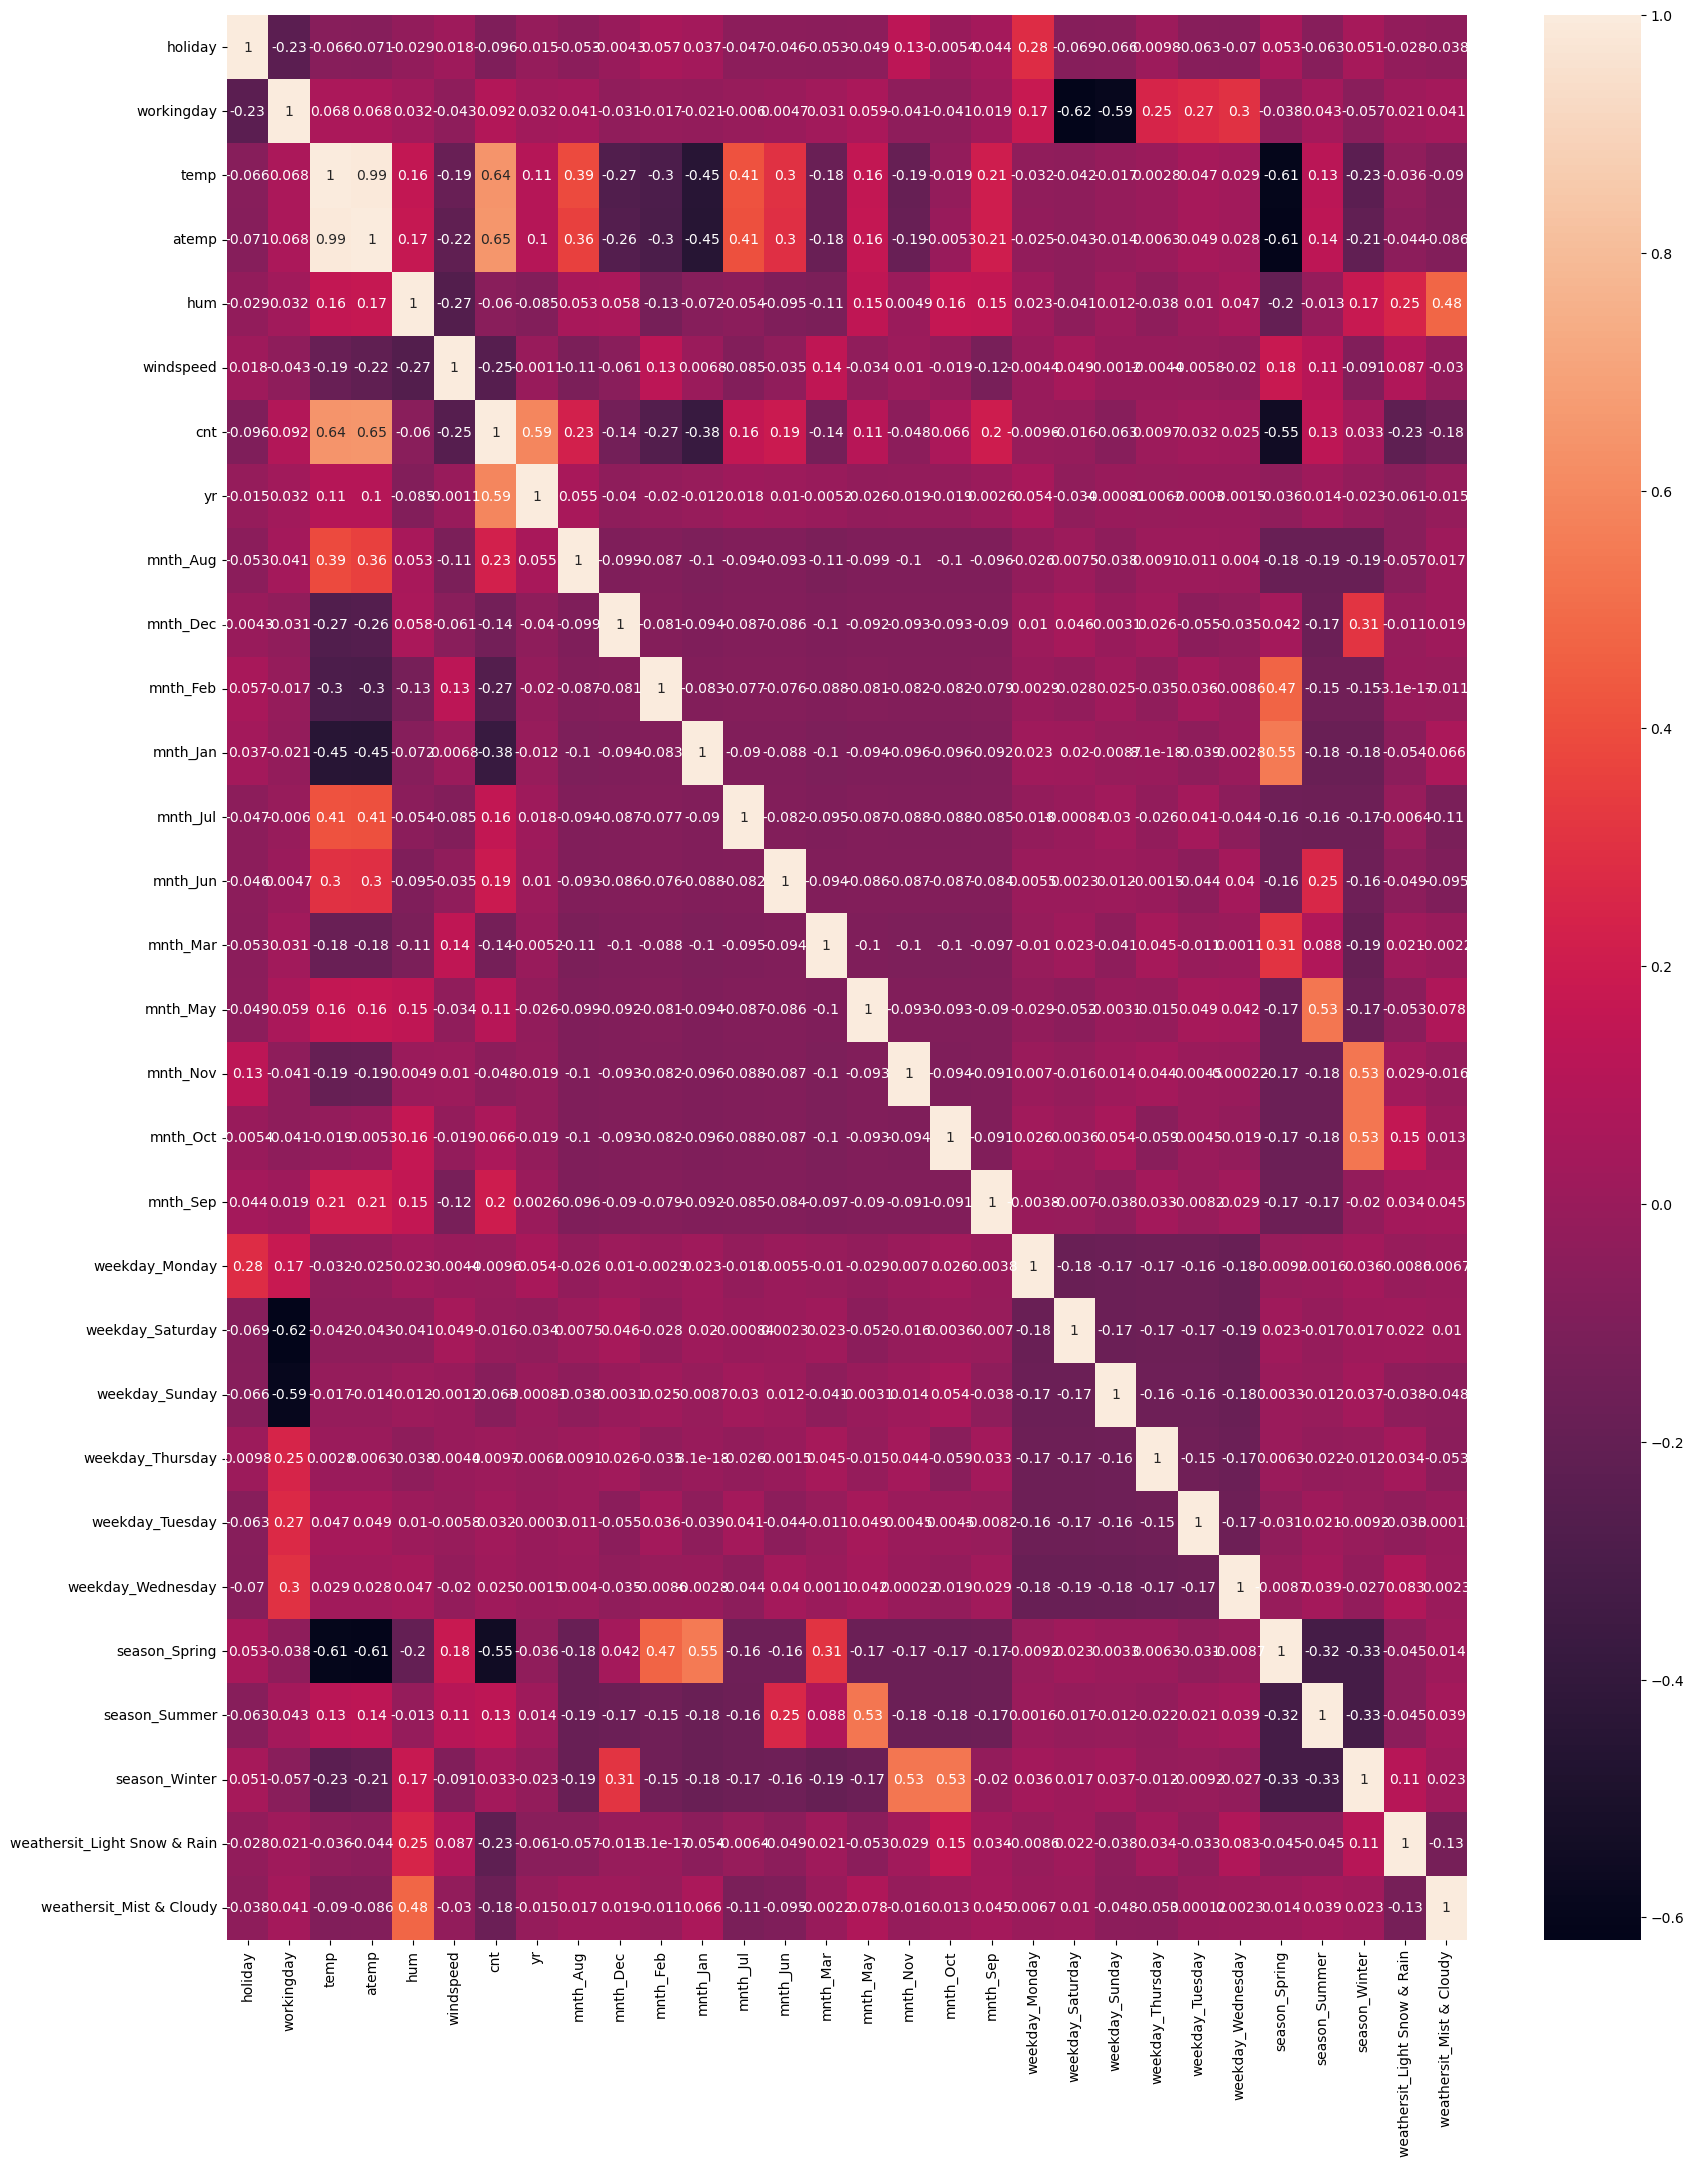

In [2900]:
## checking highly corelated variables by hitmap
plt.figure(figsize=(20,25))
sns.heatmap(train.corr(),annot=True)
plt.show()

### <font color = 'red'> Conclusion: </font>
As can be seen from the map, `atemp` and `temp` seems to be correlated to the target variable `cnt`. Since, not much can be stated about the other independent variables , hence we'll build a model using all the columns.

In [2901]:
## separating x & y  set for the model building

y_train  = train.pop('cnt')
x_train = train

In [2902]:
y_train.shape

(510,)

### step 6 - Building a linear model

Approach Used:

we will used the mixed approach for the build model

here we will using the RFE approach for feature selection and then we will use stasmodel approach foer building the model

## feature selection

we need to used the linearregression function from scikit learn for its compatibility with RFE

In [2903]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(x_train,y_train)

rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(x_train,y_train)


In [2904]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('yr', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 10),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 13),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

In [2905]:
col = x_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'yr', 'mnth_Jul',
       'mnth_Sep', 'weekday_Saturday', 'weekday_Sunday', 'season_Spring',
       'season_Summer', 'season_Winter', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [2906]:
x_train.columns[~rfe.support_]

Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Monday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [2907]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = x_train[col]
X_train_rfe.shape

(510, 15)

#### Adding a constant variable 
For statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [2908]:
print(X_train_rfe.shape)
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.describe()
print(X_train_rfe.shape)

(510, 15)
(510, 16)


In [2909]:
X_train_rfe.head()

,const,holiday,workingday,temp,hum,windspeed,yr,mnth_Jul,mnth_Sep,weekday_Saturday,weekday_Sunday,season_Spring,season_Summer,season_Winter,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
653,1.0,0,1,0.509887,0.575354,0.300794,1,0,0,0,0,0,0,1,0,0
576,1.0,0,1,0.815169,0.725633,0.264686,1,1,0,0,0,0,0,0,0,0
426,1.0,0,0,0.442393,0.640189,0.255342,1,0,0,1,0,1,0,0,0,1
728,1.0,0,0,0.245101,0.498067,0.663106,1,0,0,0,1,1,0,0,0,0
482,1.0,0,0,0.395666,0.504508,0.188475,1,0,0,1,0,0,1,0,0,1


#### Running the linear model

In [2910]:
lm_1 = sm.OLS(y_train,X_train_rfe).fit()

In [2911]:
# Check the parameters obtained
lm_1.params

const                           4.760661e+11
holiday                        -4.760661e+11
workingday                     -4.760661e+11
temp                            5.267557e-01
hum                            -1.584037e-01
windspeed                      -1.797437e-01
yr                              2.295608e-01
mnth_Jul                       -5.462236e-02
mnth_Sep                        8.173564e-02
weekday_Saturday               -4.760661e+11
weekday_Sunday                 -4.760661e+11
season_Spring                  -5.620184e-02
season_Summer                   5.252424e-02
season_Winter                   9.979192e-02
weathersit_Light Snow & Rain   -2.463912e-01
weathersit_Mist & Cloudy       -5.787690e-02
dtype: float64

#### Summary of the linear model

In [2912]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.0
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          4.66e-191
Time:                        18:11:03   Log-Likelihood:                 516.40
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     495   BIC:                            -939.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [2913]:
## holiday p values greater that 0.05 so we need to drop

print(X_train_rfe.shape)
X_train_rfe = X_train_rfe.drop(columns=['holiday'])
#X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.describe()
print(X_train_rfe.shape)

(510, 16)
(510, 15)


In [2914]:
lm_1 = sm.OLS(y_train,X_train_rfe).fit()

In [2915]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          1.13e-191
Time:                        18:11:03   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### <font color = 'red'> Conclusion : </font>
Here we see that the p-value for all the variables is < 0.05 . Hence, we keep all the columns and proceed with the model. 

### checking VIF for multicolinearity

### $ vif_i = \frac{1}{1 - {R_i}^2} $ 

In [2916]:
# calculate for  VIFs for the new model
vif = pd.DataFrame()
x = X_train_rfe
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['vif']  = round(vif['vif'],2)
vif = vif.sort_values(by="vif",ascending=False)
vif

,Features,vif
0,const,114.08
1,workingday,9.07
8,weekday_Saturday,6.06
9,weekday_Sunday,5.74
10,season_Spring,5.02
2,temp,3.62
12,season_Winter,3.49
11,season_Summer,2.61
3,hum,1.91
14,weathersit_Mist & Cloudy,1.57


#### We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [2917]:
# dropping `holiday` column as the vif is > 5
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [2918]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\indra\AppData\Roaming\Python\Python39\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Features,VIF
2,hum,32.14
1,temp,18.98
0,workingday,18.41
7,weekday_Saturday,4.91
3,windspeed,4.90
9,season_Spring,4.80
8,weekday_Sunday,4.76
11,season_Winter,3.71
10,season_Summer,3.03
13,weathersit_Mist & Cloudy,2.31


In [2919]:
# dropping `hum` column as the vif is > 5
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [2920]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,workingday,16.19
1,temp,12.73
2,windspeed,4.75
6,weekday_Saturday,4.45
7,weekday_Sunday,4.21
8,season_Spring,3.82
10,season_Winter,2.80
9,season_Summer,2.75
3,yr,2.07
4,mnth_Jul,1.60


In [2921]:
# dropping `workingday` column as the vif is > 5
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

In [2922]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.17
1,windspeed,4.62
8,season_Summer,2.23
7,season_Spring,2.11
2,yr,2.07
9,season_Winter,1.82
3,mnth_Jul,1.59
11,weathersit_Mist & Cloudy,1.55
4,mnth_Sep,1.33
5,weekday_Saturday,1.22


### Preparing the final model

In [2923]:
# Adding a constant variable 
print(X_train_rfe.shape)
X_train_lm_2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(X_train_rfe.shape)

(510, 12)
(510, 12)


In [2924]:
# Check the summary
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          1.01e-186
Time:                        18:11:04   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### <font color = 'red'> Conclusion: </font> 

Here we see that except for temp(that has a vif value slightly more than 5, that can be ignored) rest all the columns have a vif value less than 5.

Hence, we finalise `lm_2` as the final model to proceed with the future prdeictions.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the distplot of the error terms and see what it looks like.

In [2925]:
y_train_cnt = lm_2.predict(X_train_lm_2)

c:\Users\indra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

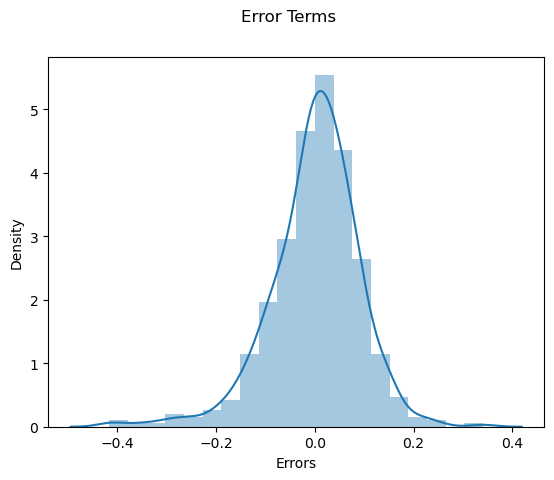

In [2926]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms')                  # Plot heading 
plt.xlabel('Errors')                         # X-label

### <font color = 'red'> Conclusion: </font>

We can clearly see that the error terms are centred around 0 and follows a normal distribution, this is in accordance with the stated assumptions of linear regression.

#### Cross-verifying the above conclusion using a qq-plot as well:

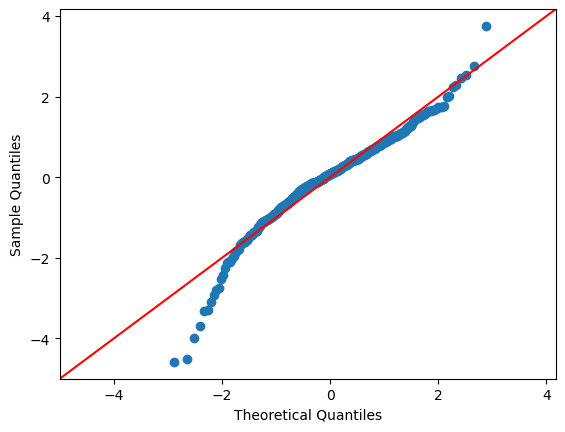

In [2927]:
# Plot the qq-plot of the error terms
sm.qqplot((y_train - y_train_cnt), fit=True, line='45')
plt.show()

### Conclusion:
Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed .

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model that we got.

#### Applying the scaling on the test sets

In [2928]:
num_vars = ['cnt','hum','windspeed','temp','atemp']


test[num_vars] = scaler.transform(test[num_vars])

In [2929]:
test.shape

(219, 30)

#### Dividing into X_test and y_test

In [2930]:
y_test = test.pop('cnt')
X_test = test

In [2931]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

#### Predicting using values used by the final model

In [2932]:
test_col = X_train_lm_2.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()
print(X_test.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   temp                          219 non-null    float64
 2   windspeed                     219 non-null    float64
 3   yr                            219 non-null    int64  
 4   mnth_Jul                      219 non-null    uint8  
 5   mnth_Sep                      219 non-null    uint8  
 6   weekday_Saturday              219 non-null    uint8  
 7   weekday_Sunday                219 non-null    uint8  
 8   season_Spring                 219 non-null    uint8  
 9   season_Summer                 219 non-null    uint8  
 10  season_Winter                 219 non-null    uint8  
 11  weathersit_Light Snow & Rain  219 non-null    uint8  
 12  weathersit_Mist & Cloudy      219 non-null    uint8  
dtypes: f

In [2933]:
# Making predictions using the final model

y_pred = lm_2.predict(X_test)

#### Calculating r-squared

 R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [2934]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8058142386351406

### <font color = 'red'> Conclusion: </font>

We can see that the `r_squared on the test set is 0.805` and the `r-squared on the trained set 0.837` which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

## Step 9: Model Evaluation

Plotting the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

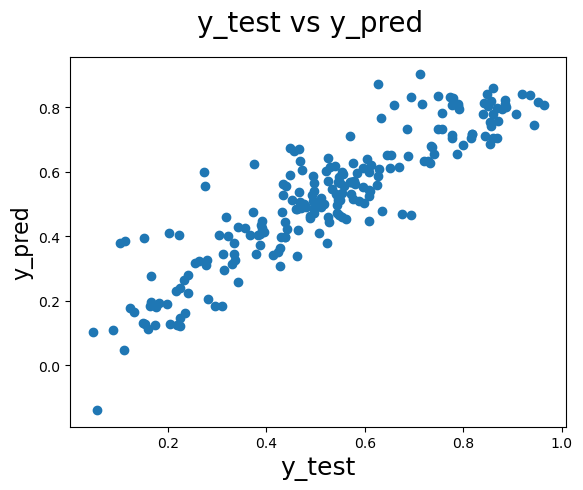

In [2935]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


### Conclusion: 
We can colude that the final model fit isn't by chance, and has descent predictive power.

#### Getting the variable names and the coefficient values for the final equation of the best fitted line

In [2936]:
param = pd.DataFrame(lm_2.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,13))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
1,temp,0.493363
3,yr,0.234126
0,const,0.200531
10,season_Winter,0.082950
5,mnth_Sep,0.072144
9,season_Summer,0.046884
6,weekday_Saturday,0.015705
7,weekday_Sunday,-0.042224
4,mnth_Jul,-0.049155


### <font color = 'red'> Final Conclusions : </font>
By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

$ cnt = 0.2466 + 0.493 \times  temp + 0.2342  \times  yr + 0.0829 \times season Winter + 0.072 \times mnth Sept + 0.046 \times season Summer  - 0.015 \times weekday_Saturday - 0.042 \times weekday_Sunday - 0.049 \times mnth Jul - 0.067 \times season Spring - 0.0816 \times weathersit Mist Cloudy - 0.1513 \times windspeed - 0.2857 \times weathersit Light Snow Rain $

#### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
#### All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

- From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 81% of bike demand.
- Coeffiencients of the variables explains the factors effecting the bike demand

- Based on final model top three features contributing significantly towards explaining the demand are:

 - Temperature (0.437655)
 - weathersit : Light Snow, Light Rain + Mist & Cloudy (-0.292892)
 - year (0.234287)

Hence, it can be clearly concluded that the variables `temperature` , `season`/ `weather situation` and `month`  are significant in predicting the demand for shared bikes .

## <font color='red'> Final Recommendations for the Company: </font>

- The months - Jul , Sep should be considered by the company as they have a higher demand as compared to other months.
- With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
- During the Winter season the demand rises, hence it should be well prepared to meet the high demand